In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [361]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [362]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [363]:
df['returnb'] = df['domestic_gross'] / df['budget']
df.sort_values('budget',ascending=False).head(50)

,Unnamed: 0,movie_title,domestic_distributor,budget,domestic_opening_sales,earliest_release,rating,runtime_minutes,genres,summary_sales,crew_list,cast_list,domestic_sales,international_sales,worldwide_sales,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Family,History,Horror,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western,genre_top10,genre_top3,genre_top2,domestic_dist_processed,dd_top5,release_date,is_sequel,month,director,top50_d,top25_d,Tom Cruise,Robert Downey Jr.,Kathleen Kennedy,Zack Snyder,Will Smith,Kevin Feige,Denzel Washington,Clint Eastwood,Alan Silvestri,Steven Spielberg,Jon Favreau,Leonardo DiCaprio,John Lasseter,John Williams,Bradley Cooper,Michael Keaton,Emma Watson,Ian McKellen,Ben Affleck,Kenneth Branagh,Matt Damon,Julia Roberts,Chiwetel Ejiofor,Tom Hanks,Jim Carrey,Samuel L. Jackson,Dwayne Johnson,George Clooney,Scarlett Johansson,Bruce Berman,Vin Diesel,Chris Evans,Harrison Ford,David Heyman,Johnny Depp,Djimon Hounsou,Mark Ruffalo,Robin Wright,Giovanni Ribisi,Daniel Craig,Brad Pitt,Paul Bettany,Morgan Freeman,Ryan Reynolds,Gal Gadot,Angelina Jolie,Jason Statham,Thomas Tull,Tommy Lee Jones,James Newton Howard,bankable_count,domestic_gross,year,returnb
1,1,Avengers: Endgame,Walt Disney Studios Motion Pictures,356000000,357115007,2019-04-24,PG-13,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[['Domestic', 858373000], ['International', 19...","['Anthony Russo', 'Joe Russo', 'Christopher Ma...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",[858373000],[1939427564],[2797800564],1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,Walt Disney Studios Motion Pictures,1,2019-04-24,1,4,Anthony Russo,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,858373000,2019,2.411160
7,7,Star Wars: Episode VIII,Walt Disney Studios Motion Pictures,317000000,220009584,2017-12-13,PG-13,152.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 620181382], ['International', 71...","['Rian Johnson', 'Rian Johnson', 'George Lucas...","['Daisy Ridley', 'John Boyega', 'Mark Hamill',...",[620181382],[712516117],[1332697499],1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,Walt Disney Studios Motion Pictures,1,2017-12-13,1,12,Rian Johnson,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,620181382,2017,1.956408
71,72,Pirates of the Caribbean: At World's End,Walt Disney Studios Motion Pictures,300000000,114732820,2007-05-22,PG-13,169.0,"['Action', 'Adventure', 'Fantasy']","[['Domestic', 309420425], ['International', 65...","['Gore Verbinski', 'Ted Elliott', 'Terry Rossi...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",[309420425],[651576067],[960996492],1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,Walt Disney Studios Motion Pictures,1,2007-05-22,1,5,Gore Verbinski,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,309420425,2007,1.031401
4,4,Avengers: Infinity War,Walt Disney Studios Motion Pictures,300000000,257698183,2018-04-25,PG-13,149.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 678815482], ['International', 13...","['Anthony Russo', 'Joe Russo', 'Christopher Ma...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",[678815482],[1369544272],[2048359754],1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,Walt Disney Studios Motion Pictures,1,2018-04-25,1,4,Anthony Russo,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,678815482,2018,2.262718
130,135,Justice League,Warner Bros.,300000000,93842239,2017-10-17,PG-13,120.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 229024295], ['International', 42...","['Zack Snyder', 'Jerry Siegel', 'Joe Shuster',...","['Ben Affleck', 'Gal Gadot', 'Jason Momoa', 'E...",[229024295],[428902692],[657926987],1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,Warner Bros.,1,2017-10-17,0,10,Zack Snyder,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [364]:
df1 = df[['budget','is_sequel','month','top50_d','year','bankable_count','runtime_minutes','domestic_gross']]

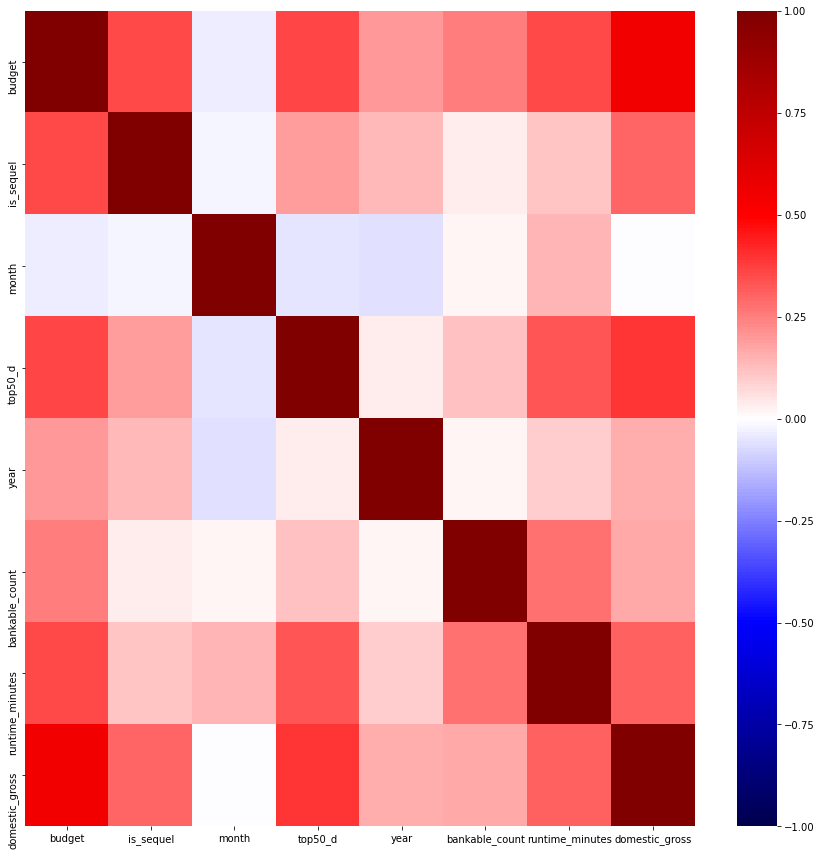

In [365]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-366-0640107250d6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


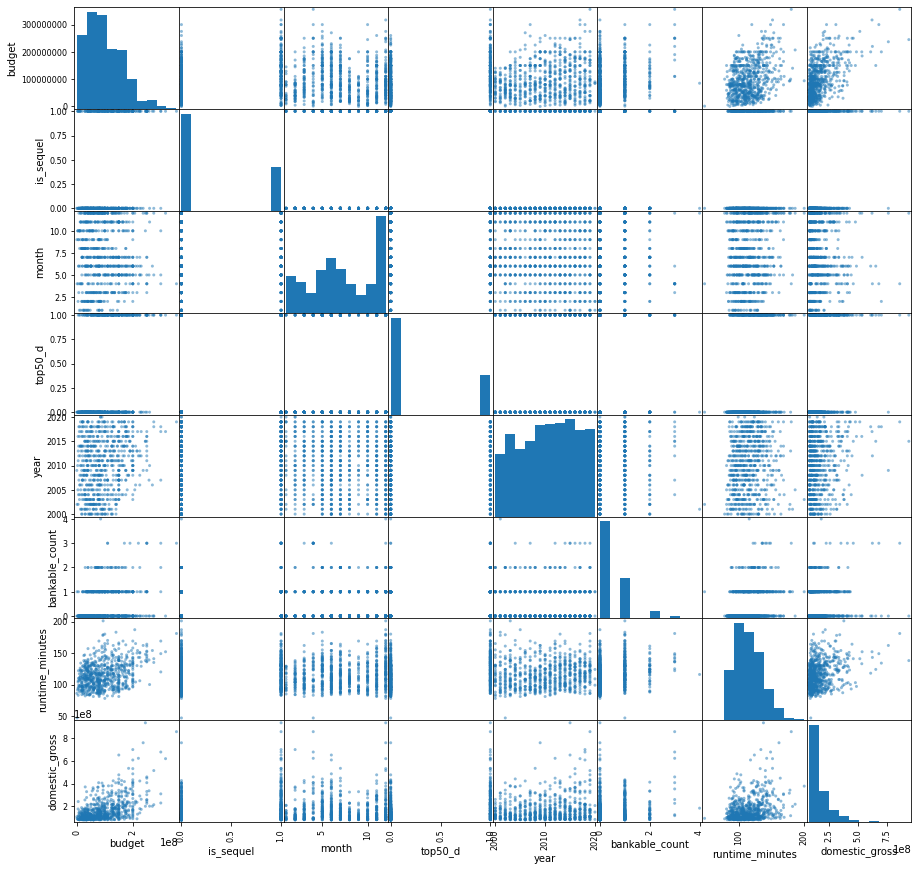

In [366]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

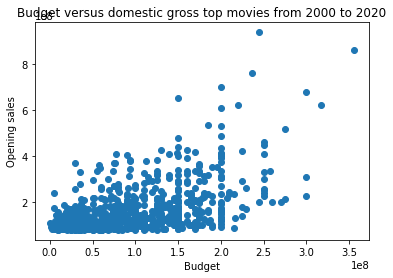

In [367]:
budget_x = df['budget']
sales_y = df['domestic_gross']

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic gross top movies from 2000 to 2020');

In [368]:
x = df[['movie_title','budget','is_sequel','rating','top50_d','dd_top5','year','runtime_minutes','month','bankable_count','Action','Adventure','Animation','Comedy','Drama','Horror']]


y = df['domestic_gross']

x_tr, x_test, y_tr, y_test = train_test_split(x, y,test_size=.25, random_state=12)

In [369]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=.30, random_state=11)

In [370]:
# DF for continuous variables
x_cont_train = x_train[['budget','is_sequel','top50_d','year','runtime_minutes','Horror']]
                        
x_cont_val = x_val[['budget','is_sequel','top50_d','year','runtime_minutes','Horror']]
x_cont_test = x_test[['budget','is_sequel','top50_d','year','runtime_minutes','Horror']]

In [371]:
# DFfor categorical variable
x_cat_train = x_train[['rating']]
x_cat_val = x_val[['rating']]
x_cat_test = x_test[['rating']]

In [372]:
# Dummify x_cat_train
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(x_cat_train)

ohe_x_train = ohe.transform(x_cat_train)

columns = ohe.get_feature_names(['rating'])

ohe_x_train_df = pd.DataFrame(ohe_x_train, columns=columns, index=x_cat_train.index)

In [373]:
# Dummify x_cat_val
ohe_v = OneHotEncoder(drop='first', sparse=False)

ohe_v.fit(x_cat_val)

ohe_x_val = ohe_v.transform(x_cat_val)

columns_v = ohe_v.get_feature_names(['rating'])

ohe_x_val_df = pd.DataFrame(ohe_x_val, columns=columns_v, index=x_cat_val.index)

In [374]:
# Dummify x_cat_test
ohe_te = OneHotEncoder(drop='first', sparse=False)

ohe_te.fit(x_cat_test)

ohe_x_test = ohe_te.transform(x_cat_test)

columns_te = ohe_te.get_feature_names(['rating'])

ohe_x_test_df = pd.DataFrame(ohe_x_test, columns=columns_te, index=x_cat_test.index)

In [375]:
#Merge cont and cat DFs
combo_train_df = pd.concat([x_cont_train, ohe_x_train_df], axis=1)

combo_val_df =  pd.concat([x_cont_val, ohe_x_val_df], axis=1)

combo_test_df =  pd.concat([x_cont_test, ohe_x_test_df], axis=1)

In [376]:
combo_lr = LinearRegression()

combo_lr.fit(combo_train_df, y_train)

combo_lr.score(combo_val_df, y_val) #R2

y_pred = combo_lr.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

86731228.84958708

In [377]:
combo_lr.score(combo_val_df, y_val) #R2

0.31323809003643854

In [378]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.74
is_sequel : 10495071.32
top50_d : 38771687.56
year : 861001.23
runtime_minutes : 855328.44
Horror : 3211717.35
rating_PG : -674950.14
rating_PG-13 : -15399030.77
rating_R : -22176770.65


In [379]:
combo_train_df['budget_seq'] = combo_train_df['budget'] * combo_train_df['is_sequel']
combo_val_df['budget_seq'] = combo_val_df['budget'] * combo_val_df['is_sequel']
combo_test_df['budget_seq'] = combo_test_df['budget'] * combo_test_df['is_sequel']


In [380]:
combo_lr2 = LinearRegression()

combo_lr2.fit(combo_train_df, y_train)

combo_lr2.score(combo_val_df, y_val) #R2

y_pred = combo_lr2.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

82038065.31219158

In [381]:
combo_lr2.score(combo_val_df, y_val) #R2

0.385550747541056

Adding an interaction between budget and sequel improved the R^2

In [382]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr2.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.56
is_sequel : -41898624.73
top50_d : 37659581.64
year : 799489.83
runtime_minutes : 794980.24
Horror : 12832912.77
rating_PG : -4918407.13
rating_PG-13 : -21473155.37
rating_R : -28568449.17
budget_seq : 0.49


In [383]:
combo_train_df['budget_horror'] = combo_train_df['budget'] * combo_train_df['Horror']
combo_val_df['budget_horror'] = combo_val_df['budget'] * combo_val_df['Horror']
combo_test_df['budget_horror'] = combo_test_df['budget'] * combo_test_df['Horror']

LASSO ANALYSIS BELOW

In [384]:
from sklearn.linear_model import LassoCV

In [385]:
selected_columns = ['budget','is_sequel','top50_d','year',
                    'runtime_minutes','Horror',
                   'rating_PG','rating_PG-13','rating_R','budget_seq','budget_horror']

In [386]:
lcv = LassoCV()
s = StandardScaler(with_mean=False)
x_train_scaled = s.fit_transform(combo_train_df)
lcv.fit(x_train_scaled,y_train)

print('Train R^2:')
lcv.score(x_train_scaled, y_train)

Train R^2:


0.387333635181201

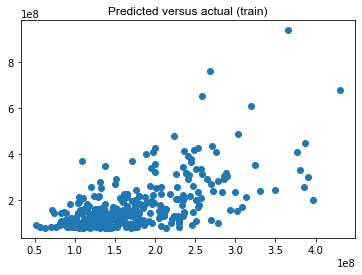

In [387]:
x_train_pred = lcv.predict(s.transform(combo_train_df))

plt.scatter(x_train_pred,y_train)
plt.title('Predicted versus actual (train)',family='arial',fontsize=12);

In [388]:
print('Val R^2:')
lcv.score(s.transform(combo_val_df),y_val)

Val R^2:


0.3788229674986041

R^2 for val is consistent with train

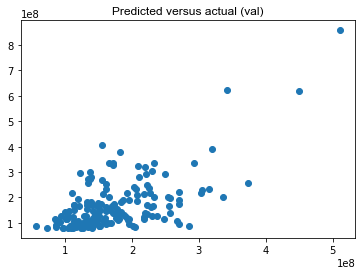

In [389]:
x_val_pred = lcv.predict(s.transform(combo_val_df))
plt.scatter(x_val_pred,y_val)
plt.title('Predicted versus actual (val)',family='arial',fontsize=12);

In [390]:
print('Test R^2:')
lcv.score(s.transform(combo_test_df),y_test)

Test R^2:


0.3934817765986033

R^2 for test is consistent with valand train

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


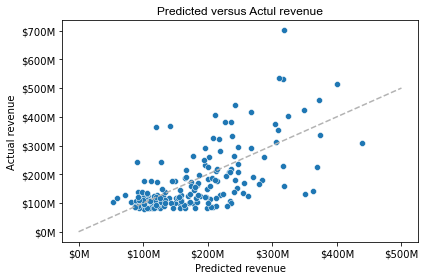

In [433]:
x_test_pred = lcv.predict(s.transform(combo_test_df))

fig, ax = plt.subplots()
sns.scatterplot(x_test_pred,y_test)
plt.xlabel('Predicted revenue')
plt.ylabel('Actual revenue')
ax.plot(np.linspace(0,500000000,7), np.linspace(0,500000000,7), ls="--", c=".7")
plt.tight_layout()
plt.title('Predicted versus Actul revenue',family='arial',fontsize=12);
plt.xticks(np.linspace(0,500000000,6), ['$0M', '$100M','$200M','$300M','$400M', '$500M'])
plt.yticks(np.linspace(0,700000000,8), ['$0M','$100M','$200M','$300M','$400M','$500M','$600M','$700M'])
plt.tight_layout()
plt.savefig('predictedactual.svg');
plt.show;

In [392]:
print('Scaled coefficients:')
list(zip(selected_columns, lcv.coef_))

Scaled coefficients:


[('budget', 36179320.15356105),
 ('is_sequel', -14695224.80020013),
 ('top50_d', 16057977.708492093),
 ('year', 3638919.967112042),
 ('runtime_minutes', 15118145.334586805),
 ('Horror', 4112360.0018574577),
 ('rating_PG', 400912.7007569347),
 ('rating_PG-13', -6110460.889020047),
 ('rating_R', -8071720.524334474),
 ('budget_seq', 27946217.15746448),
 ('budget_horror', -3683305.167545518)]

In [393]:
print('Unscaled coefficients:')
list(zip(selected_columns, s.transform(lcv.coef_.reshape(1, -1))[0]))

Unscaled coefficients:


[('budget', 0.5938329770381934),
 ('is_sequel', -31964253.06968227),
 ('top50_d', 36095819.585708916),
 ('year', 641161.7357410284),
 ('runtime_minutes', 736997.3027943439),
 ('Horror', 17975425.34428965),
 ('rating_PG', 928330.6039235577),
 ('rating_PG-13', -12239725.14238889),
 ('rating_R', -19517330.873967696),
 ('budget_seq', 0.414027034160016),
 ('budget_horror', -0.27348613520819137)]

In [436]:
lcv.intercept_

-1267362725.2607174

TRAIN RMSE BELOW

In [394]:

xy_train = pd.concat([x_train['movie_title'],combo_train_df,y_train],axis=1)

xy_train[['budget', 'is_sequel', 'top50_d', 'year', 'runtime_minutes', 'Horror',
       'rating_PG', 'rating_PG-13', 'rating_R', 'budget_seq', 'budget_horror']] = s.transform(xy_train[['budget', 'is_sequel', 'top50_d', 'year', 'runtime_minutes', 'Horror',
       'rating_PG', 'rating_PG-13', 'rating_R', 'budget_seq', 'budget_horror']])

In [395]:
# Calculate residual and residual squared
xy_train['res'] = lcv.predict(xy_train[['budget','is_sequel','top50_d','year',
                    'runtime_minutes','Horror',
                   'rating_PG','rating_PG-13','rating_R','budget_seq','budget_horror']])-xy_train['domestic_gross']

xy_train['res2'] = xy_train['res'] ** 2

In [396]:
xy_train.sort_values('res')

,movie_title,budget,is_sequel,top50_d,year,runtime_minutes,Horror,rating_PG,rating_PG-13,rating_R,budget_seq,budget_horror,domestic_gross,res,res2
0,Star Wars: Episode VII,4.021333,2.175146,2.247843,355.034161,6.727388,0.000000,0.000000,2.003077,0.000000,3.629709,0.000000,936662225,-5.715609e+08,3.266818e+17
2,Avatar,3.890024,0.000000,0.000000,353.976987,7.897368,0.000000,0.000000,2.003077,0.000000,0.000000,0.000000,760507625,-4.918842e+08,2.419500e+17
5,Jurassic World,2.462040,2.175146,2.247843,355.034161,6.044899,0.000000,0.000000,2.003077,0.000000,2.222271,0.000000,652295625,-3.932589e+08,1.546526e+17
8,Incredibles 2,3.282720,2.175146,2.247843,355.562748,5.752404,0.000000,2.315543,0.000000,0.000000,2.963027,0.000000,608581744,-2.884825e+08,8.322216e+16
38,The Passion of the Christ,0.492408,0.000000,0.000000,353.096009,6.191147,0.000000,0.000000,0.000000,2.417989,0.000000,0.000000,370782930,-2.613612e+08,6.830969e+16
13,Frozen II,2.462040,2.175146,0.000000,355.738943,5.021166,0.000000,2.315543,0.000000,0.000000,2.222271,0.000000,477373578,-2.541770e+08,6.460593e+16
4,Avengers: Infinity War,4.924081,2.175146,2.247843,355.562748,7.263629,0.000000,0.000000,2.003077,0.000000,4.444541,0.000000,678815482,-2.482514e+08,6.162875e+16
18,Captain Marvel,2.626176,0.000000,0.000000,355.738943,5.996150,0.000000,0.000000,2.003077,0.000000,0.000000,0.000000,426829839,-2.262628e+08,5.119485e+16
46,American Sniper,0.965120,0.000000,0.000000,354.857965,6.483642,0.000000,0.000000,0.000000,2.417989,0.000000,0.000000,350126372,-2.127687e+08,4.527051e+16
30,Frozen,2.462040,0.000000,0.000000,354.681770,4.972417,0.000000,2.315543,0.000000,0.000000,0.000000,0.000000,400953009,-2.124802e+08,4.514782e+16


In [397]:
xy_train['res2'].mean()
print('Train RMSE:')
np.sqrt(xy_train['res2'].mean())

Train RMSE:


83568366.85632163

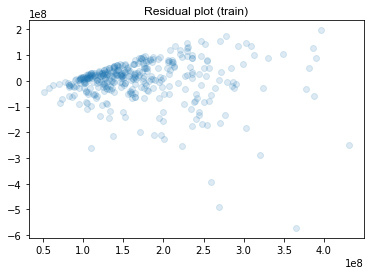

In [398]:
plt.scatter(x_train_pred,xy_train['res'],alpha = 0.15)
plt.title('Residual plot (train)',family='arial',fontsize=12);

VAL RMSE BELOW

In [399]:
xy_val = pd.concat([x_val['movie_title'],combo_val_df,y_val],axis=1)

xy_val[['budget', 'is_sequel', 'top50_d', 'year', 'runtime_minutes', 'Horror',
       'rating_PG', 'rating_PG-13', 'rating_R', 'budget_seq', 'budget_horror']] = s.transform(xy_val[['budget', 'is_sequel', 'top50_d', 'year', 'runtime_minutes', 'Horror',
       'rating_PG', 'rating_PG-13', 'rating_R', 'budget_seq', 'budget_horror']])

In [400]:
# Calculate residual and residual squared
xy_val['res'] = lcv.predict(xy_val[['budget','is_sequel','top50_d','year',
                    'runtime_minutes','Horror',
                   'rating_PG','rating_PG-13','rating_R','budget_seq','budget_horror']])-xy_val['domestic_gross']

xy_val['res2'] = xy_val['res'] ** 2

In [401]:
xy_val['res2'].mean()
# RMSE for VAL
print('Val RMSE:')
np.sqrt(xy_val['res2'].mean())

Val RMSE:


82485971.66940306

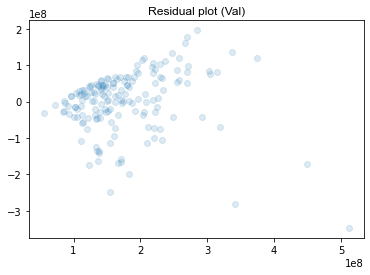

In [402]:
plt.scatter(x_val_pred,xy_val['res'],alpha=0.15)
plt.title('Residual plot (Val)',family='arial',fontsize=12);

TEST RMSE BELOW

In [403]:
xy_test = pd.concat([x_test['movie_title'],combo_test_df,y_test],axis=1)

In [404]:
xy_test[['budget', 'is_sequel', 'top50_d', 'year', 'runtime_minutes', 'Horror',
       'rating_PG', 'rating_PG-13', 'rating_R', 'budget_seq', 'budget_horror']] = s.transform(xy_test[['budget', 'is_sequel', 'top50_d', 'year', 'runtime_minutes', 'Horror',
       'rating_PG', 'rating_PG-13', 'rating_R', 'budget_seq', 'budget_horror']])

In [405]:
# Calculate residual and residual squared
xy_test['res'] = lcv.predict(xy_test[['budget','is_sequel','top50_d','year',
                    'runtime_minutes','Horror',
                   'rating_PG','rating_PG-13','rating_R','budget_seq','budget_horror']])-xy_test['domestic_gross']
xy_test['res2'] = xy_test['res'] ** 2

In [406]:
xy_test['res2'].mean()
# RMSE for TEST
print('Test RMSE:')
np.sqrt(xy_test['res2'].mean())

Test RMSE:


82570297.73494588

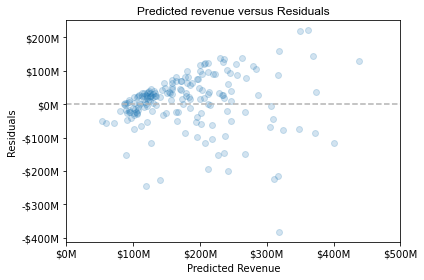

In [432]:
#res1 = y_holdout1 - test_set_pred1
#sns.scatterplot(test_set_pred_clipped1, res1)




#xs = np.linspace(0,170000000,2)
#horiz_line_data = np.array([40 for i in range(len(xs))])
#plt.plot(xs, horiz_line_data, ls="--", c=".7") 

#plt.xticks(np.linspace(0,170000000,8), ['$0M','25M','$50M','$75M','$100M','$125M','15M','$175M'])
#plt.yticks(np.linspace(-100000000,250000000,8), ['-$100M','-$50M','$0M','$50M','$100M', '$150M', '$200M', '$250M'])
#plt.suptitle('Prediction vs. Error')
#plt.savefig('viz/residuals_vs_predicted_rev.svg')


plt.scatter(x_test_pred,xy_test['res'],alpha=0.2)
plt.axhline(0, ls="--", c=".7")
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.xticks(np.linspace(0,500000000,6), ['$0M', '$100M','$200M','$300M','$400M', '$500M'])
plt.yticks(np.linspace(-400000000,200000000,7), ['-$400M','-$300M','-$200M','-$100M','$0M','$100M','$200M'])
plt.tight_layout()
plt.title('Predicted revenue versus Residuals',family='arial',fontsize=12)
plt.tight_layout()
plt.savefig('residualplot.svg');

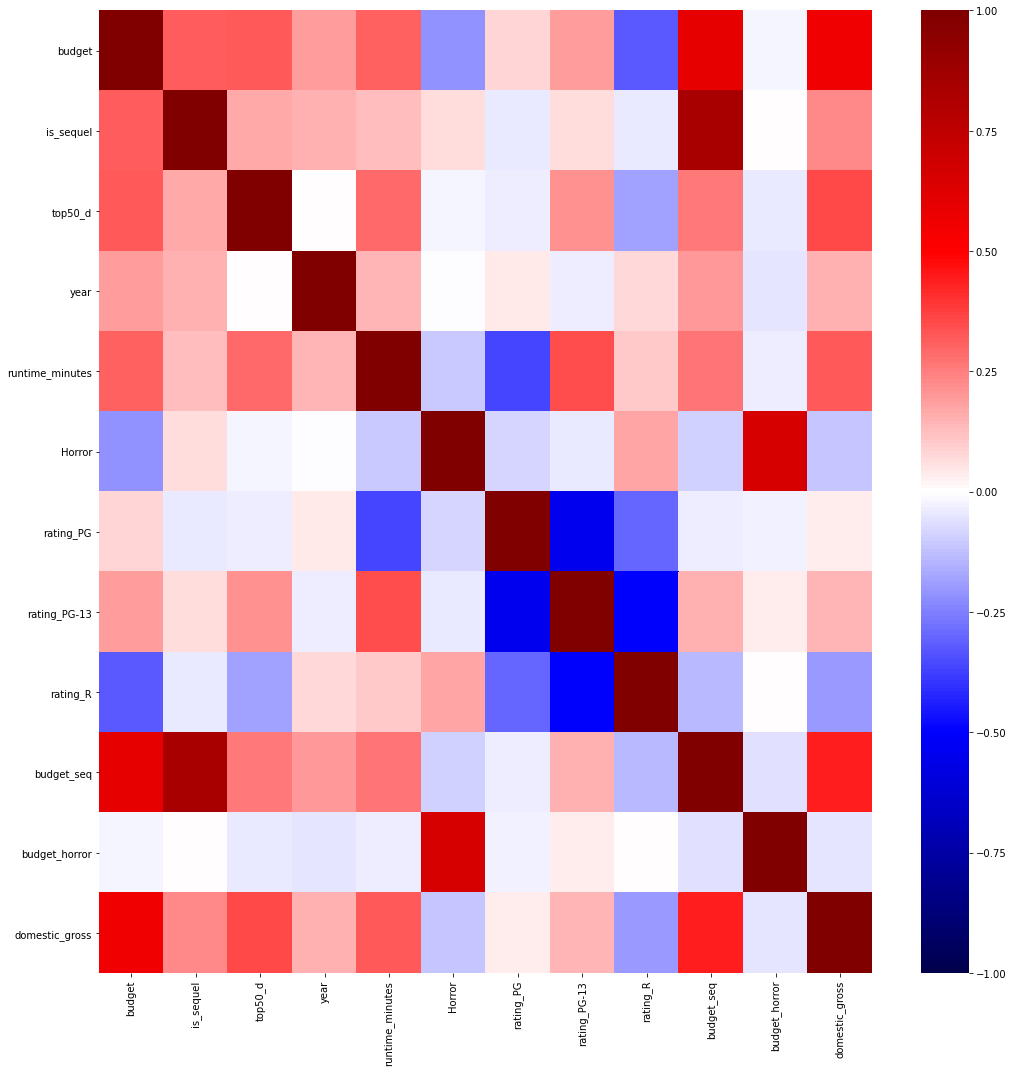

In [431]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(xy_train[['budget',
                     'is_sequel',
                     'top50_d',
                     'year',
                     'runtime_minutes',
                     'Horror',
                      'rating_PG',
                      'rating_PG-13',
                      'rating_R',
                     'budget_seq',
                     'budget_horror',
                     'domestic_gross']].corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax)
plt.tight_layout()
plt.savefig('feauture_correlation.svg');

In [ ]:
 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
    'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
    'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
    'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
    'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
    'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
    'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
    'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
    'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
    'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest',
    'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 
    'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
    'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
    'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
    'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
    'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
    'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
    'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
    'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 
    'winter_r'
